<a href="https://colab.research.google.com/github/svhenrique/pi-opencv-basic/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*    A segmentação de imagens é o processo de particionar uma imagem em regiões significativas
*    As regiões são construídas usando algum recurso, como cor, bordas ou similaridade vizinha
*    Algoritmos são baseados nas propriedades de descontinuidade e similaridade.
   *    Descontinuidade: fronteiras das regiões são diferentes
   *    Similaridade: pixels em uma região pode ser aglomerados por critério semelhante
*    Exemplos:
   *    Detecção de pontos e linhas
   *    Detecção de arestas
   *    Aglomeração de regiões

O processo de segmentação divide uma região $R$ em $n$ subregiões, $R_1$, $R_2$, $R_3$, $\dots$, $R_n$, de modo que:

* $\cup_{i=1}^n R_i = R$ 
* $R_i$ é um conjunto conectado, para $i = 1, 2, \dots, n$.
* $R_i \cap R_j = \emptyset$, para todo $i$ e $j$, $i \neq j$.
* Uma propriedade $P$ aplicada a uma região $R_i$ satisfaz à relação $P(R_i) = \textrm{VERDADEIRO}$ para $i = 1, 2, \dots, n$.
* Para esta mesma propriedade, $P(R_i \cup R_j) = \textrm{FALSO}$ para duas regiões adjacentes $R_i$ e $R_j$.


# Preparando ambiente

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io

In [5]:
# variável contendo imagens para testes
image_path = "/content/drive/My Drive/images/"

# Detecção de pontos, linhas e bordas




* Matrizes laplacianas são usadas para procesamento de imagem
* Alguns usos dessas matrizes são: detecção de pontos, detecção de arestas, etc.

$$
\begin{array}{|r|r|r|}
\hline
0 & -1 & 0\\
\hline
-1 & 4 & -1\\
\hline
0 & -1 & 0\\
\hline
\end{array}
$$

$$
\begin{array}{|r|r|r|}
\hline
-1 & -1 & -1\\
\hline
-1 & 8 & -1\\
\hline
-1 & -1 & -1\\
\hline
\end{array}
$$

* Pode-se assumir que um pontos, ocorre quando:

<center>
<!-- \[ -->
$$
g(x,y)= 
\begin{cases}
    1,& \text{se } |R(x, y)| \geq T\\
    0,              & \text{caso contrário}
\end{cases}
$$
<!-- \] -->
</center>

* $R(x,y)$ é o resultado da resposta da máscara no ponto central $(x,y)$ de uma região
* $T$ é um limiar não negativo que regula a intensidade da resposta que será considerada como ponto isolado
* Ex: $T$ igual a $90$% do maior valor absoluto presente na imagem

## Detecção de pontos

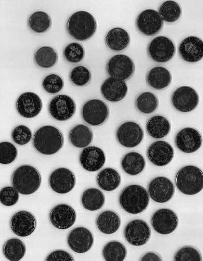

In [6]:
# lendo imagem, transformando em cinza e mudando tamanho
image = io.imread(image_path + "coins.jpg")
image_gray = cv.cvtColor(image, cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image_gray, None, fx=.52, fy=.52))

In [9]:
# preparando primeira matriz para detecção de arestas
matrix1 = [
  [0, 1, 0],
  [1, -4, 1],
	[0, 1, 0]]

kernel1 = np.array(matrix1, dtype="int")

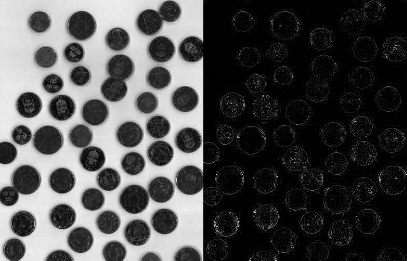

In [12]:
# aplicando filtro na imagem
res = cv.filter2D(image_gray, -1, kernel1)

# concatenando imagem original com imagem após o filtro
final_image = cv.hconcat((image_gray, res))

# mostrando resultado
cv2_imshow(cv.resize(final_image, None, fx=.52, fy=.52))

## Detecção de linhas

* Uso do laplaciano com valores positivos da resposta (evita linhas grossas)

* Detecção de linhas em direções específicas

<table>
<tr>
<td>
$$
\begin{array}{|r|r|r|}
\hline
-1 & -1 & -1\\
\hline
2 & 2 & 2\\
\hline
-1 & -1 & -1\\
\hline
\end{array}
$$
</td>
<td>
$$
\begin{array}{|r|r|r|}
\hline
2 & -1 & -1\\
\hline
-1 & 2 & -1\\
\hline
-1 & -1 & 2\\
\hline
\end{array}
$$
</td>
<td>
$$
\begin{array}{|r|r|r|}
\hline
-1 & -1 & 2\\
\hline
-1 & 2 & -1\\
\hline
2 & -1 & -1\\
\hline
\end{array}
$$
</td>
<td>
$$
\begin{array}{|r|r|r|}
\hline
-1 & 2 & -1\\
\hline
-1 & 2 & -1\\
\hline
-1 & 2 & -1\\
\hline
\end{array}
$$
</td>
</tr>
<tr>
   <td align="center">Horizontal</td>
   <td align="center">+45º</td>
   <td align="center">-45º</td>
   <td align="center">Vertical</td>
</tr>
</table>

* Avaliando-se a resposta destas quatro máscaras, é possível escolher a mais proeminente como candidata a detectar a linha existente em uma direção.


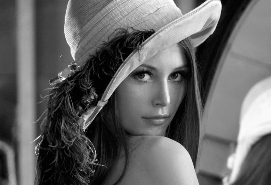

In [14]:
# lendo imagem, transformando em cinza e mudando tamanho
image = io.imread(image_path + "lena.jpg")
image_gray = cv.cvtColor(image, cv.COLOR_RGBA2GRAY)
cv2_imshow(cv.resize(image_gray, None, fx=.3, fy=.3))